# Using scipy to fit "random" data

OK, let's use scipy.stats to do this. I forget how, but it should be straightforward?

In [4]:
import scipy as sp, seaborn as sns, numpy as np
from matplotlib import pyplot as plt
from scipy import stats

Generate a couple of data sets. We'll be working with histogrammed data, so let's make it all integers.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html

In [5]:
x = np.linspace(0, 5, num=500)
x_pdf = stats.maxwell.pdf(x)
samples = stats.maxwell.rvs(size=500)

bin_means, bin_edges, binnumber = stats.binned_statistic(x, x_pdf, statistic='mean', bins=25)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

In [6]:
dist = stats.maxwell
params = dist.fit(samples)
loc,scale = params[-2:]
args = params[:-2]

if args:
    fitted_pdf = dist.pdf(x,*args,loc=loc,scale=scale)
else:
    fitted_pdf = dist.pdf(x,loc=loc,scale=scale)
    

/Users/mglerner/anaconda3/envs/mccancer/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


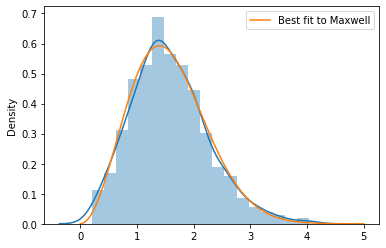

In [7]:
sns.distplot(samples)
plt.plot(x,fitted_pdf,label='Best fit to Maxwell')
plt.legend()

So that works. Let's wrap it all up in a function. If you want to add more distributions, you can just add them to the function below.

In [8]:
def fit_and_plot(samples):
    spread = max(samples) - min(samples)
    x = np.linspace(min(samples)-0.1*spread, max(samples)+0.1*spread,len(samples))
    dists = {'Maxwell':stats.maxwell,
            'Rayleigh':stats.rayleigh,
            'Gamma':stats.gamma,}
    sns.displot(samples,label='Raw data',kind='hist',stat='density') #stat = density norms the bars correctly
    for d in dists:
        dist = dists[d]
        params = dist.fit(samples)
        loc,scale = params[-2:]
        args = params[:-2]
        if args:
            fitted_pdf = dist.pdf(x,*args,loc=loc,scale=scale)
        else:
            fitted_pdf = dist.pdf(x,loc=loc,scale=scale)
        plt.plot(x,fitted_pdf,label=f'{d} loc: {loc:.2f}, scale {scale:.2f}')
    plt.legend()

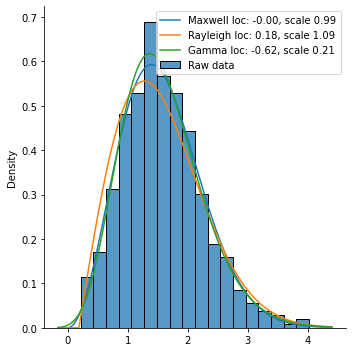

In [9]:
fit_and_plot(samples)

And now we can try it on some data that does not come from a maxwell distribution

# OLIVIA, USE THIS ONE

* revise with fewer bins
* Look for best fit with all moves
* Look for best fit after ~move 20


In [18]:
def fit_and_plot(samples,bins=None,figsize=None):
    spread = max(samples) - min(samples)
    if figsize is None:
        figsize = (8,8)
    fig, ax = plt.subplots(figsize=figsize)
    x = np.linspace(min(samples)-0.1*spread, max(samples)+0.1*spread,len(samples))
    dists = {'Maxwell':stats.maxwell,
            'Rayleigh':stats.rayleigh,
            'Gamma':stats.gamma,}
    #plt.hist(samples,density=True,bins=3)
    if bins is not None:
        sns.histplot(data=samples,label='Raw data',#kind='hist',
                    stat='density',
                    ax=ax,
                   bins=bins) #stat = density norms the bars correctly
    else:
        sns.displot(samples,label='Raw data',kind='hist',
                    stat='density',) #stat = density norms the bars correctly        
    for d in dists:
        
        dist = dists[d]
        params = dist.fit(samples)
        loc,scale = params[-2:]
        args = params[:-2]
        if args:
            fitted_pdf = dist.pdf(x,*args,loc=loc,scale=scale)
        else:
            fitted_pdf = dist.pdf(x,loc=loc,scale=scale)
        plt.plot(x,fitted_pdf,label=f'{d} loc: {loc:.2f}, scale {scale:.2f}')
    plt.legend()


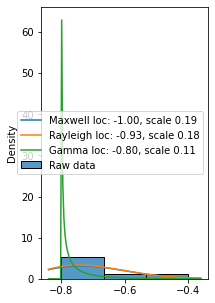

In [22]:
other_data = []
for i in range(100):
    other_data.append(-0.8)
for i in range(20):
    other_data.append(-0.6)
for i in range(20):
    other_data.append(-0.4)
fit_and_plot(other_data,bins=3,figsize=(3,5))

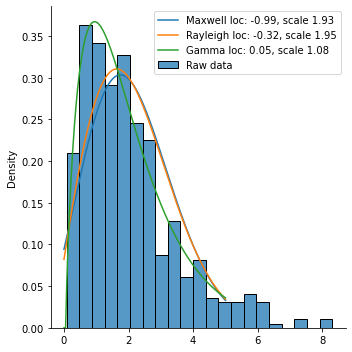

In [7]:
samples_tricky = stats.gamma.rvs(a=2,size=500)
fit_and_plot(x,samples_tricky)

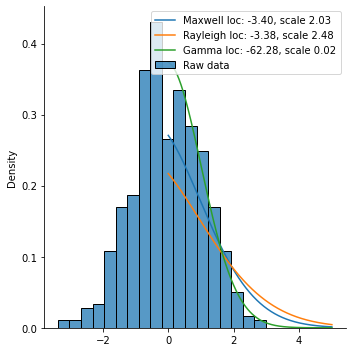

In [8]:
samples_tricky = stats.norm.rvs(size=500)
fit_and_plot(x,samples_tricky)

Of course, you may be looking at functions that have negative values. If you recall, the Maxwell-Boltzmann distribution is the "root mean square" distribution of molecular speeds. Meaning it's always going to want to be positive. A common trick is to just square the data you're looking at, and then fit it to a Maxwell distribution. Still not a great fit for normally distributed data ... but it shouldn't be! That's what a Gamma distribution is, and you can see that it fits well.

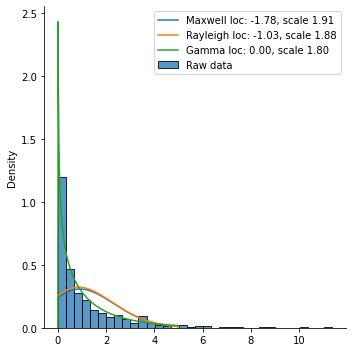

In [9]:
fit_and_plot(x,samples_tricky**2)